## An example of the Shmidt decomposition.

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from shmidt import shmidt_decomp

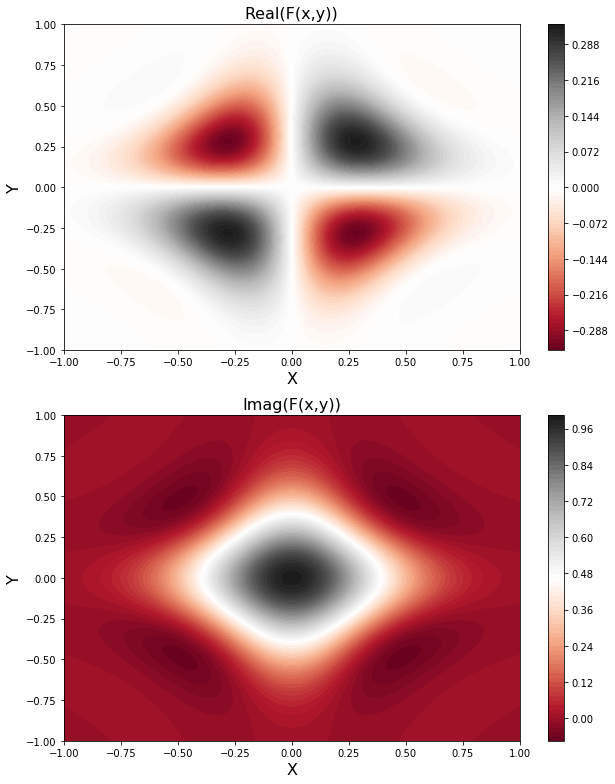

In [65]:

def f(x, y):
    return np.exp(-(x**2 + y**2)/0.2) * (np.sin(x*y/0.1) + 1j * np.cos(x*y/0.1))

grd = 100
x = np.linspace(-1, 1, grd)
y = np.linspace(-1, 1, grd)

X, Y = np.meshgrid(x, y)
F = f(X, Y)


fig = plt.figure(figsize=(9, 11))
plt.subplot(211)
plt.contourf(X, Y, np.real(F), 100, cmap='RdGy')
plt.title('Real(F(x,y))', fontsize=16)
plt.colorbar()
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.subplot(212)
plt.contourf(X, Y, np.imag(F), 100, cmap='RdGy')
plt.title('Imag(F(x,y))', fontsize=16)
plt.colorbar()
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.tight_layout()
plt.show()


In [40]:
# Decomposition.
modes1, modes2, eigvals, phases = shmidt_decomp(F, modes_num=40)


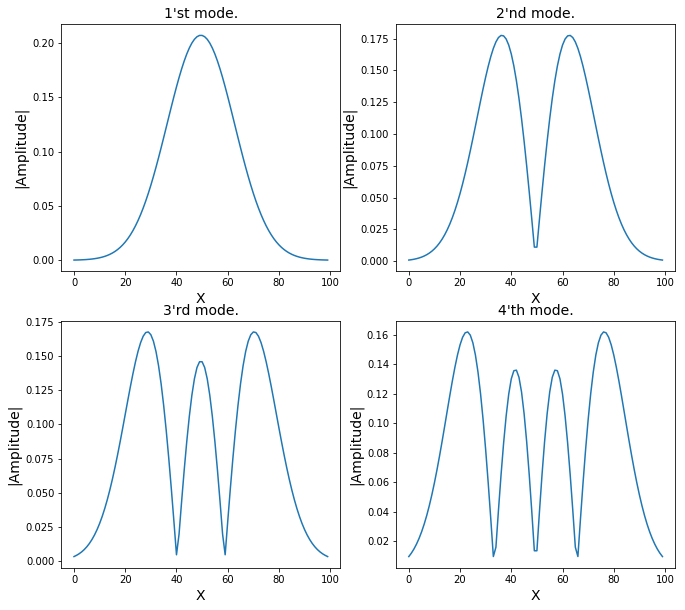

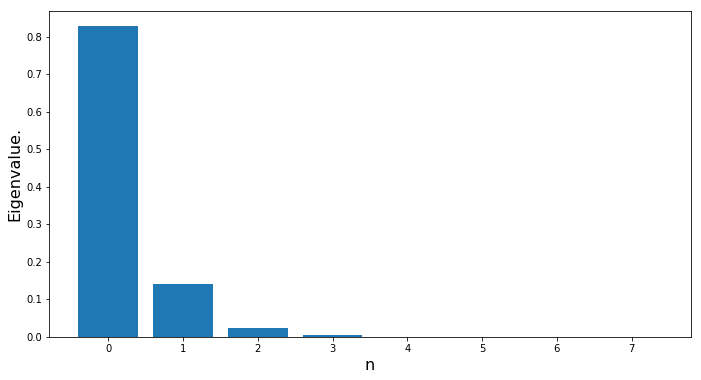

In [63]:
# Plotting modes and eigenvalues.
fig = plt.figure(figsize=(11, 10))
plt.subplot(221)
plt.plot(np.abs(modes1[0, :]))
plt.xlabel('X', fontsize=14)
plt.title("1'st mode.", fontsize=14)
plt.ylabel('|Amplitude|', fontsize=14)
plt.subplot(222)
plt.plot(np.abs(modes1[1, :]))
plt.xlabel('X', fontsize=14)
plt.title("2'nd mode.", fontsize=14)
plt.ylabel('|Amplitude|', fontsize=14)
plt.subplot(223)
plt.plot(np.abs(modes1[2, :]))
plt.xlabel('X', fontsize=14)
plt.title("3'rd mode.", fontsize=14)
plt.ylabel('|Amplitude|', fontsize=14)
plt.subplot(224)
plt.plot(np.abs(modes1[3, :]))
plt.xlabel('X', fontsize=14)
plt.title("4'th mode.", fontsize=14)
plt.ylabel('|Amplitude|', fontsize=14)
plt.show()


fig2 = plt.figure(figsize=(11.5, 6))
x = eigvals[:8]
plt.bar(np.arange(len(x)), x)
plt.ylabel('Eigenvalue.', fontsize=16)
plt.xlabel('n', fontsize=16)
plt.show()


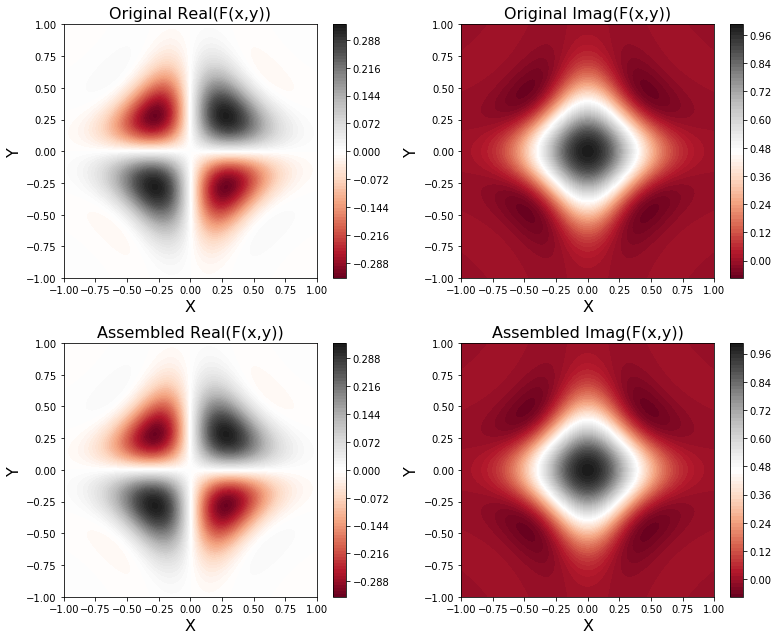

In [73]:
# Assembling initial function back to check the decomposition.

f_combined = np.zeros((grd, grd), dtype=complex)

for n in range(40):
    f_combined += np.sqrt(eigvals[n]) * phases[n] * np.tensordot(modes1[n, :], modes2[n, :], axes=0)


fig = plt.figure(figsize=(11, 9))
plt.subplot(221)
plt.contourf(X, Y, np.real(F), 100, cmap='RdGy')
plt.title('Original Real(F(x,y))', fontsize=16)
plt.colorbar()
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.subplot(222)
plt.contourf(X, Y, np.imag(F), 100, cmap='RdGy')
plt.title('Original Imag(F(x,y))', fontsize=16)
plt.colorbar()
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.subplot(223)
plt.contourf(X, Y, np.real(f_combined), 100, cmap='RdGy')
plt.title('Assembled Real(F(x,y))', fontsize=16)
plt.colorbar()
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.subplot(224)
plt.contourf(X, Y, np.imag(f_combined), 100, cmap='RdGy')
plt.title('Assembled Imag(F(x,y))', fontsize=16)
plt.colorbar()
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.tight_layout()
plt.show()
